In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
working_dir = "C:/Users/Rohan Pudipeddi/Downloads/"
os.chdir(working_dir)

In [3]:
# Read SpotifyAudioFeaturesApril2019.csv using read.csv() function
playlist = pd.read_csv("SpotifyAudioFeaturesApril2019.csv")

#print the total rows and columns of the dataframe
print("Total Rows:", playlist.shape[0])
print("Total Columns:", playlist.shape[1])

Total Rows: 130663
Total Columns: 17


In [4]:
playlist.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [5]:
# Pre processing the data 
# Missing value imputation
# KNN Imputation for Missing Values
numeric_columns = playlist.select_dtypes(include=['int64', 'float64', 'float32']).columns
imputer = KNNImputer(n_neighbors=5, weights='uniform')
playlist[numeric_columns] = imputer.fit_transform(playlist[numeric_columns])

In [6]:
# Normalization
scaler = MinMaxScaler()
playlist[numeric_columns] = scaler.fit_transform(playlist[numeric_columns])

In [7]:
playlist[numeric_columns].head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005843,0.745984,0.041944,0.339,0.000,0.090909,0.081281,0.846552,1.0,0.423395,0.815763,0.8,0.118,0.15
1,0.024498,0.849398,0.037739,0.557,0.000,0.727273,0.286286,0.853331,1.0,0.473085,0.636079,0.8,0.371,0.00
2,0.025100,0.605422,0.024204,0.723,0.000,0.818182,0.082482,0.875481,0.0,0.046998,0.459895,0.8,0.382,0.56
3,0.029518,0.803213,0.021791,0.579,0.912,0.454545,0.099499,0.774714,0.0,0.072567,0.492045,0.8,0.641,0.00
4,0.000035,0.786145,0.021548,0.792,0.878,0.636364,0.033233,0.804501,1.0,0.068427,0.480221,0.8,0.928,0.00


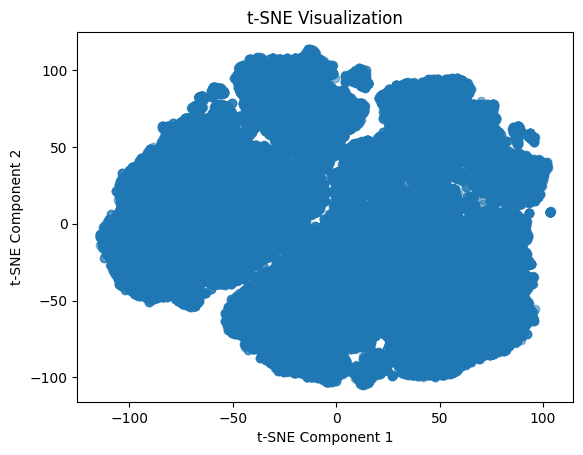

In [8]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(playlist[numeric_columns])

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['tsne1', 'tsne2'])

# Concatenate the t-SNE results with the original DataFrame
playlist_with_tsne = pd.concat([playlist, tsne_df], axis=1)

# Visualize the t-SNE results
plt.scatter(playlist_with_tsne['tsne1'], playlist_with_tsne['tsne2'], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

c:\Users\Rohan Pudipeddi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rohan Pudipeddi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rohan Pudipeddi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rohan Pudipeddi\AppData\Local\Programs\Python\

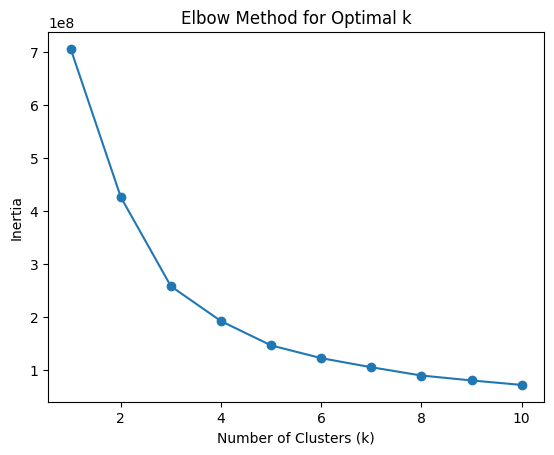

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Extract t-SNE components
tsne_components = playlist_with_tsne[['tsne1', 'tsne2']]

# Initialize a list to store the inertia values
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_components)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


c:\Users\Rohan Pudipeddi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


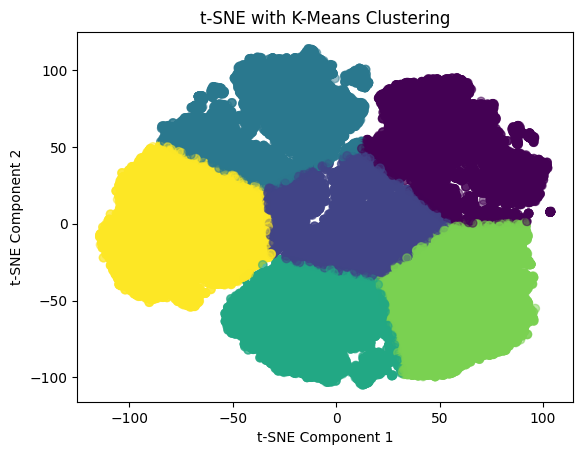

In [10]:
# Apply k-means clustering on the t-SNE results
kmeans = KMeans(n_clusters = 6, random_state=42)
playlist_with_tsne['cluster'] = kmeans.fit_predict(playlist_with_tsne[['tsne1', 'tsne2']])

# Visualize the clustered data on the t-SNE plot
plt.scatter(playlist_with_tsne['tsne1'], playlist_with_tsne['tsne2'], c=playlist_with_tsne['cluster'], cmap='viridis', alpha=0.5)
plt.title('t-SNE with K-Means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [12]:
#Show total values in each cluster
playlist_with_tsne['cluster'].value_counts()

cluster
5    25876
4    23469
2    21146
0    20539
1    19870
3    19763
Name: count, dtype: int64

In [14]:
#Append the dataset with cluster column
playlist['cluster'] = playlist_with_tsne['cluster']
playlist.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,cluster
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005843,0.745984,0.041944,0.339,0.000,0.090909,0.081281,0.846552,1.0,0.423395,0.815763,0.8,0.118,0.15,4
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024498,0.849398,0.037739,0.557,0.000,0.727273,0.286286,0.853331,1.0,0.473085,0.636079,0.8,0.371,0.00,3
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025100,0.605422,0.024204,0.723,0.000,0.818182,0.082482,0.875481,0.0,0.046998,0.459895,0.8,0.382,0.56,5
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029518,0.803213,0.021791,0.579,0.912,0.454545,0.099499,0.774714,0.0,0.072567,0.492045,0.8,0.641,0.00,2
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.786145,0.021548,0.792,0.878,0.636364,0.033233,0.804501,1.0,0.068427,0.480221,0.8,0.928,0.00,2


In [15]:
# Show track name and cluster of 20 random songs for each cluster
for cluster in playlist['cluster'].unique():
    print(f'Cluster {cluster}:')
    print(playlist[playlist['cluster'] == cluster].sample(20)['track_name'])
    print('\n')

Cluster 4:
128144                                                Tough
41247                                            Miles Away
71790                                             Mary Jane
96425     Anything More (feat. Era Istrefi) - Will Spark...
94544                                                 Elvis
73421                                            Avoidance.
4673                                      It’s Snowin Pt. 2
36919                                          In the Ocean
110545                   Alles ist an Gottes Segen, BWV 263
18406                                     A State of Trance
9363                                   All Hell Broke Loose
11478                    Heart Speak - Dzeko vs Waves Remix
67650                                    Mindstate of a Don
22741                   Just Another (feat. Rydah J. Klyde)
28454                                            In Between
62501                   Blue Suitcase (Product of us Remix)
126964                       

In [16]:
# Label the clusters as follows - Cluster 0: 'Calm and Relaxing', Cluster 1: Upbeat and Cheerful, Cluster 2: Chill and Groovy, Cluster 3: Emotional and Expressive, Cluster 4: Diverse and Energetic, Cluster 5: Soulful and Sensual
playlist['cluster'] = playlist['cluster'].map({0: 'Calm and Relaxing', 1: 'Upbeat and Cheerful', 2: 'Chill and Groovy', 3: 'Emotional and Expressive', 4: 'Diverse and Energetic', 5: 'Soulful and Sensual'})

In [17]:
playlist.head(15)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,cluster
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005843,0.745984,0.041944,0.339,0.000,0.090909,0.081281,0.846552,1.0,0.423395,0.815763,0.8,0.118,0.15,Diverse and Energetic
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024498,0.849398,0.037739,0.557,0.000,0.727273,0.286286,0.853331,1.0,0.473085,0.636079,0.8,0.371,0.00,Emotional and Expressive
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025100,0.605422,0.024204,0.723,0.000,0.818182,0.082482,0.875481,0.0,0.046998,0.459895,0.8,0.382,0.56,Soulful and Sensual
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029518,0.803213,0.021791,0.579,0.912,0.454545,0.099499,0.774714,0.0,0.072567,0.492045,0.8,0.641,0.00,Chill and Groovy
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.786145,0.021548,0.792,0.878,0.636364,0.033233,0.804501,1.0,0.068427,0.480221,0.8,0.928,0.00,Chill and Groovy
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001155,0.813253,0.021548,0.417,0.919,0.818182,0.106106,0.796314,0.0,0.082091,0.480133,0.8,0.837,0.00,Chill and Groovy
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000541,0.822289,0.023104,0.720,0.863,0.363636,0.072773,0.826861,0.0,0.156315,0.496046,0.8,0.934,0.00,Chill and Groovy
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115462,0.888554,0.031860,0.348,0.000,0.818182,0.107107,0.767417,1.0,0.466874,0.568483,0.8,0.180,0.00,Emotional and Expressive
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000059,0.742972,0.021548,0.472,0.847,0.727273,0.095996,0.825033,1.0,0.057039,0.480169,0.8,0.622,0.00,Upbeat and Cheerful
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.816265,0.023104,0.731,0.910,1.000000,0.072773,0.826263,1.0,0.072153,0.496158,0.8,0.944,0.00,Upbeat and Cheerful


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming 'cluster' is the target variable
X = playlist_with_tsne[['tsne1', 'tsne2']]
y = playlist_with_tsne['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy}")
print("Classification Report:\n", svm_classification_report)

SVM Accuracy: 0.9968111431414066
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6172
           1       1.00      0.99      0.99      5943
           2       1.00      1.00      1.00      6381
           3       1.00      1.00      1.00      5808
           4       1.00      1.00      1.00      7064
           5       1.00      1.00      1.00      7831

    accuracy                           1.00     39199
   macro avg       1.00      1.00      1.00     39199
weighted avg       1.00      1.00      1.00     39199



In [19]:
svm_train_accuracy = svm_classifier.score(X_train, y_train)
print(f"SVM Training Accuracy: {svm_train_accuracy}")

SVM Training Accuracy: 0.9968949532056328


In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'cluster' is the target variable
X = playlist_with_tsne[['tsne1', 'tsne2']]
y = playlist_with_tsne['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)

print(f"KNN Accuracy: {knn_accuracy}")
print("Classification Report:\n", knn_classification_report)

KNN Accuracy: 0.997984642465369
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6172
           1       1.00      1.00      1.00      5943
           2       1.00      1.00      1.00      6381
           3       1.00      1.00      1.00      5808
           4       1.00      1.00      1.00      7064
           5       1.00      1.00      1.00      7831

    accuracy                           1.00     39199
   macro avg       1.00      1.00      1.00     39199
weighted avg       1.00      1.00      1.00     39199



In [21]:
knn_train_accuracy = knn_classifier.score(X_train, y_train)
print(f"KNN Training Accuracy: {knn_train_accuracy}")

KNN Training Accuracy: 0.9993986705151754


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'cluster' is the target variable
X = playlist_with_tsne[['tsne1', 'tsne2']]
y = playlist_with_tsne['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print("Classification Report:\n", rf_classification_report)

Random Forest Accuracy: 0.9985203704176127
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6172
           1       1.00      1.00      1.00      5943
           2       1.00      1.00      1.00      6381
           3       1.00      1.00      1.00      5808
           4       1.00      1.00      1.00      7064
           5       1.00      1.00      1.00      7831

    accuracy                           1.00     39199
   macro avg       1.00      1.00      1.00     39199
weighted avg       1.00      1.00      1.00     39199



In [23]:
rf_train_accuracy = rf_classifier.score(X_train, y_train)
print(f"Random Forest Training Accuracy: {rf_train_accuracy}")

Random Forest Training Accuracy: 1.0


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Create a list of classifiers
classifiers = [
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each classifier using cross-validation
for clf_name, clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print(f'{clf_name} Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

# Train each classifier on the entire training set and evaluate on the test set
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print(f'{clf_name} Test Accuracy: {test_accuracy:.4f}')


SVM Cross-Validation Accuracy: 0.9974 (+/- 0.0004)
KNN Cross-Validation Accuracy: 0.9983 (+/- 0.0001)
Random Forest Cross-Validation Accuracy: 0.9985 (+/- 0.0002)
SVM Test Accuracy: 0.9968
KNN Test Accuracy: 0.9980
Random Forest Test Accuracy: 0.9985


In [25]:
# Generate predictions using all classifiers
svm_predictions = svm_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Create mood label dictionary
mood_labels = {
    0: 'Calm and Relaxing',
    1: 'Upbeat and Cheerful',
    2: 'Chill and Groovy',
    3: 'Emotional and Expressive',
    4: 'Diverse and Energetic',
    5: 'Soulful and Sensual'
}

# Print the predicted mood labels for the first 10 songs in the test set
print(f'SVM Predicted Moods: {[mood_labels[pred] for pred in svm_predictions[:10]]}')
print(f'KNN Predicted Moods: {[mood_labels[pred] for pred in knn_predictions[:10]]}')
print(f'Random Forest Predicted Moods: {[mood_labels[pred] for pred in rf_predictions[:10]]}')



SVM Predicted Moods: ['Calm and Relaxing', 'Chill and Groovy', 'Emotional and Expressive', 'Diverse and Energetic', 'Chill and Groovy', 'Upbeat and Cheerful', 'Upbeat and Cheerful', 'Emotional and Expressive', 'Diverse and Energetic', 'Diverse and Energetic']
KNN Predicted Moods: ['Calm and Relaxing', 'Chill and Groovy', 'Emotional and Expressive', 'Diverse and Energetic', 'Chill and Groovy', 'Upbeat and Cheerful', 'Upbeat and Cheerful', 'Emotional and Expressive', 'Diverse and Energetic', 'Diverse and Energetic']
Random Forest Predicted Moods: ['Calm and Relaxing', 'Chill and Groovy', 'Emotional and Expressive', 'Diverse and Energetic', 'Chill and Groovy', 'Upbeat and Cheerful', 'Upbeat and Cheerful', 'Emotional and Expressive', 'Diverse and Energetic', 'Diverse and Energetic']


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Assuming 'cluster' is the target variable
X = playlist_with_tsne[['tsne1', 'tsne2']]
y = playlist_with_tsne['cluster']

# Label encoding for target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
nn_probabilities = model.predict(X_test)
nn_predictions = np.argmax(nn_probabilities, axis=-1)

# Decode label encoding
nn_predictions_decoded = label_encoder.inverse_transform(nn_predictions)

# Print classification report
print("Classification Report:\n", classification_report(label_encoder.inverse_transform(y_test), nn_predictions_decoded))





Epoch 1/20


2287/2287 [==============================] - 7s 3ms/step - loss: 0.2646 - accuracy: 0.9052 - val_loss: 0.0675 - val_accuracy: 0.9886
Epoch 2/20
2287/2287 [==============================] - 6s 3ms/step - loss: 0.1066 - accuracy: 0.9588 - val_loss: 0.0506 - val_accuracy: 0.9892
Epoch 3/20
2287/2287 [==============================] - 6s 3ms/step - loss: 0.0899 - accuracy: 0.9642 - val_loss: 0.0453 - val_accuracy: 0.9875
Epoch 4/20
2287/2287 [==============================] - 6s 3ms/step - loss: 0.0819 - accuracy: 0.9671 - val_loss: 0.0431 - val_accuracy: 0.9874
Epoch 5/20
2287/2287 [==============================] - 6s 3ms/step - loss: 0.0740 - accuracy: 0.9702 - val_loss: 0.0416 - val_accuracy: 0.9876
Epoch 6/20
2287/2287 [==============================] - 6s 3ms/step - loss: 0.0712 - accuracy: 0.9708 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch 7/20
2287/2287 [==============================] - 6s 3ms/step - loss: 0.0688 - accuracy: 0.9720 - val_loss: 0.0332 - val_accu

In [27]:
# Generate predictions using neural network
nn_probabilities = model.predict(X_test)

# Print the predicted mood labels for the first 10 songs in the test set
print(f'Neural Network Predicted Moods: {[mood_labels[pred] for pred in nn_predictions[:10]]}')

1225/1225 [==============================] - 2s 1ms/step
Neural Network Predicted Moods: ['Calm and Relaxing', 'Chill and Groovy', 'Emotional and Expressive', 'Diverse and Energetic', 'Chill and Groovy', 'Upbeat and Cheerful', 'Upbeat and Cheerful', 'Emotional and Expressive', 'Diverse and Energetic', 'Diverse and Energetic']


In [30]:
# Compare prediction mood labels of all four models
print(f'SVM Predicted Moods: {[mood_labels[pred] for pred in svm_predictions[:10]]}')
print(f'KNN Predicted Moods: {[mood_labels[pred] for pred in knn_predictions[:10]]}')
print(f'Random Forest Predicted Moods: {[mood_labels[pred] for pred in rf_predictions[:10]]}')
print(f'Neural Network Predicted Moods: {[mood_labels[pred] for pred in nn_predictions[:10]]}')

# Create a DataFrame with the predicted mood labels
predictions_df = pd.DataFrame({
    'SVM': [mood_labels[pred] for pred in svm_predictions],
    'KNN': [mood_labels[pred] for pred in knn_predictions],
    'Random Forest': [mood_labels[pred] for pred in rf_predictions],
    'Neural Network': [mood_labels[pred] for pred in nn_predictions]
})

# Create a DataFrame with the actual mood_labels names
actual_df = pd.DataFrame({
    'Actual': label_encoder.inverse_transform(y_test)
})

# Map the actual mood labels to mood_labels names dictionary
actual_df['Actual'] = actual_df['Actual'].map(mood_labels)

# Merge the two DataFrames
results_df = pd.concat([actual_df, predictions_df], axis=1)
results_df.head(10)

SVM Predicted Moods: ['Calm and Relaxing', 'Chill and Groovy', 'Emotional and Expressive', 'Diverse and Energetic', 'Chill and Groovy', 'Upbeat and Cheerful', 'Upbeat and Cheerful', 'Emotional and Expressive', 'Diverse and Energetic', 'Diverse and Energetic']
KNN Predicted Moods: ['Calm and Relaxing', 'Chill and Groovy', 'Emotional and Expressive', 'Diverse and Energetic', 'Chill and Groovy', 'Upbeat and Cheerful', 'Upbeat and Cheerful', 'Emotional and Expressive', 'Diverse and Energetic', 'Diverse and Energetic']
Random Forest Predicted Moods: ['Calm and Relaxing', 'Chill and Groovy', 'Emotional and Expressive', 'Diverse and Energetic', 'Chill and Groovy', 'Upbeat and Cheerful', 'Upbeat and Cheerful', 'Emotional and Expressive', 'Diverse and Energetic', 'Diverse and Energetic']
Neural Network Predicted Moods: ['Calm and Relaxing', 'Chill and Groovy', 'Emotional and Expressive', 'Diverse and Energetic', 'Chill and Groovy', 'Upbeat and Cheerful', 'Upbeat and Cheerful', 'Emotional and Ex

,Actual,SVM,KNN,Random Forest,Neural Network
0,Calm and Relaxing,Calm and Relaxing,Calm and Relaxing,Calm and Relaxing,Calm and Relaxing
1,Chill and Groovy,Chill and Groovy,Chill and Groovy,Chill and Groovy,Chill and Groovy
2,Emotional and Expressive,Emotional and Expressive,Emotional and Expressive,Emotional and Expressive,Emotional and Expressive
3,Diverse and Energetic,Diverse and Energetic,Diverse and Energetic,Diverse and Energetic,Diverse and Energetic
4,Chill and Groovy,Chill and Groovy,Chill and Groovy,Chill and Groovy,Chill and Groovy
5,Upbeat and Cheerful,Upbeat and Cheerful,Upbeat and Cheerful,Upbeat and Cheerful,Upbeat and Cheerful
6,Upbeat and Cheerful,Upbeat and Cheerful,Upbeat and Cheerful,Upbeat and Cheerful,Upbeat and Cheerful
7,Emotional and Expressive,Emotional and Expressive,Emotional and Expressive,Emotional and Expressive,Emotional and Expressive
8,Diverse and Energetic,Diverse and Energetic,Diverse and Energetic,Diverse and Energetic,Diverse and Energetic
9,Diverse and Energetic,Diverse and Energetic,Diverse and Energetic,Diverse and Energetic,Diverse and Energetic
